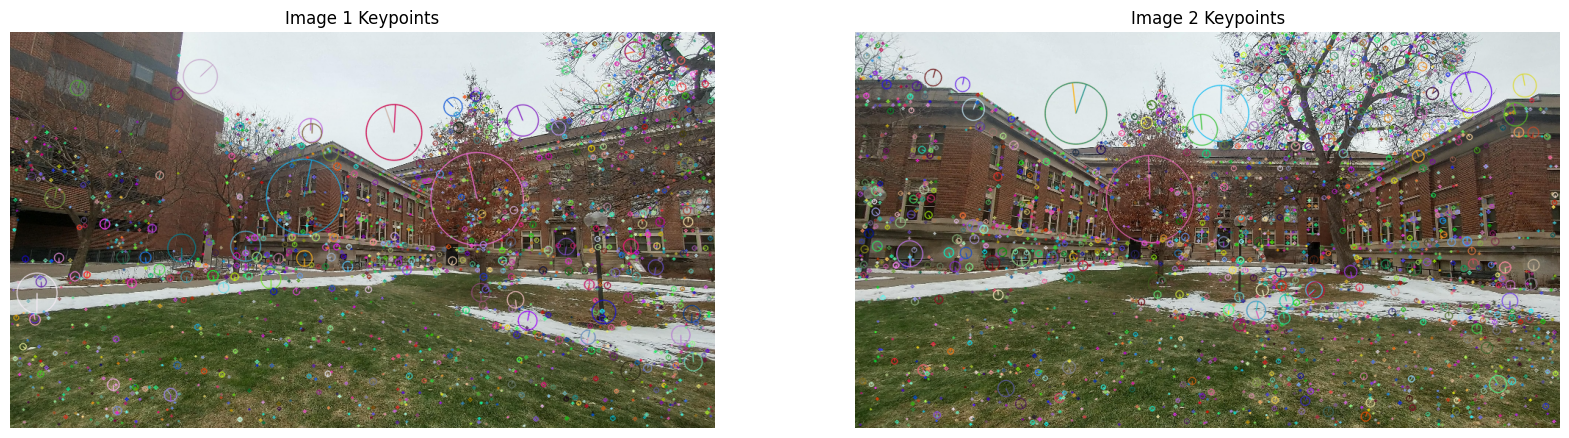

In [1]:
import cv2
import matplotlib.pyplot as plt

sift = cv2.SIFT_create()

image1 = cv2.imread('/Users/adityaarya/Documents/cv_assignment3/panaroma_generation/1.jpg')
image2 = cv2.imread('/Users/adityaarya/Documents/cv_assignment3/panaroma_generation/2.jpg')

gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

keypoint_image1 = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoint_image2 = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(keypoint_image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(keypoint_image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2 Keypoints')
plt.axis('off')

plt.show()


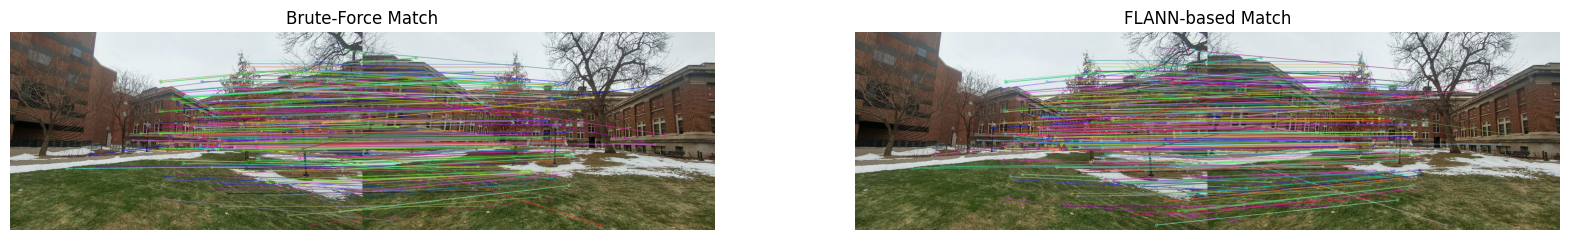

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bf = cv2.BFMatcher()

index_params = dict(algorithm = 1, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches_bf = bf.knnMatch(descriptors1, descriptors2, k=2)
matches_flann = flann.knnMatch(descriptors1, descriptors2, k=2)

good_matches_bf = []
for m,n in matches_bf:
    x = n.distance
    y = m.distance
    if y < 0.75*x:
        good_matches_bf.append(m)

img_matches_bf = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches_bf, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

good_matches_flann = []
for m,n in matches_flann:
    x = n.distance
    y = m.distance
    if y < 0.75*x:
        good_matches_flann.append(m)

img_matches_flann = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches_flann, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_matches_bf, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Match')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_matches_flann, cv2.COLOR_BGR2RGB))
plt.title('FLANN-based Match')
plt.axis('off')

plt.show()


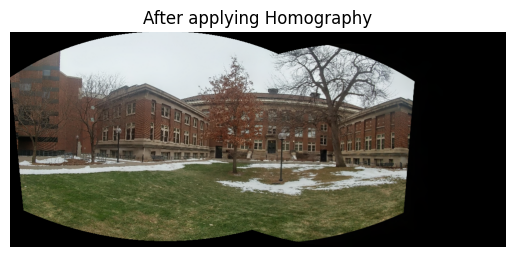

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


stitcher = cv2.Stitcher_create()

points1 = []

for match in good_matches_bf:
    point = keypoints1[match.queryIdx].pt  
    
    points1.append(point)

points1 = np.float32(points1).reshape(-1, 1, 2)

points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches_bf]).reshape(-1, 1, 2)

H_L, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
H_R, mask = cv2.findHomography(points2, points1, cv2.RANSAC)



new_width_1 = image1.shape[1] 
new_height_1 = image1.shape[0]

new_width_2 = image2.shape[1]
new_height_2 = image2.shape[0]


warped_l = cv2.warpPerspective(image1, H_R, (new_width_2, new_height_2))
warped_r = cv2.warpPerspective(image2, H_L, (new_width_1, new_height_1))

status, panorama_cropped_and_blended = stitcher.stitch([image1, warped_r])

panorama = np.concatenate((image1, warped_r), axis=1)


plt.imshow(cv2.cvtColor(panorama_cropped_and_blended, cv2.COLOR_BGR2RGB))
plt.title("After applying Homography")
plt.axis('off')
plt.show()


(-0.5, 1919.5, 539.5, -0.5)

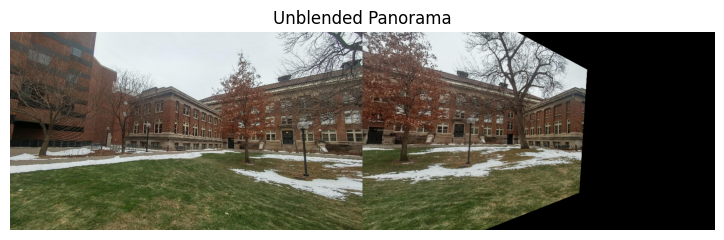

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title('Unblended Panorama')
plt.axis('off')


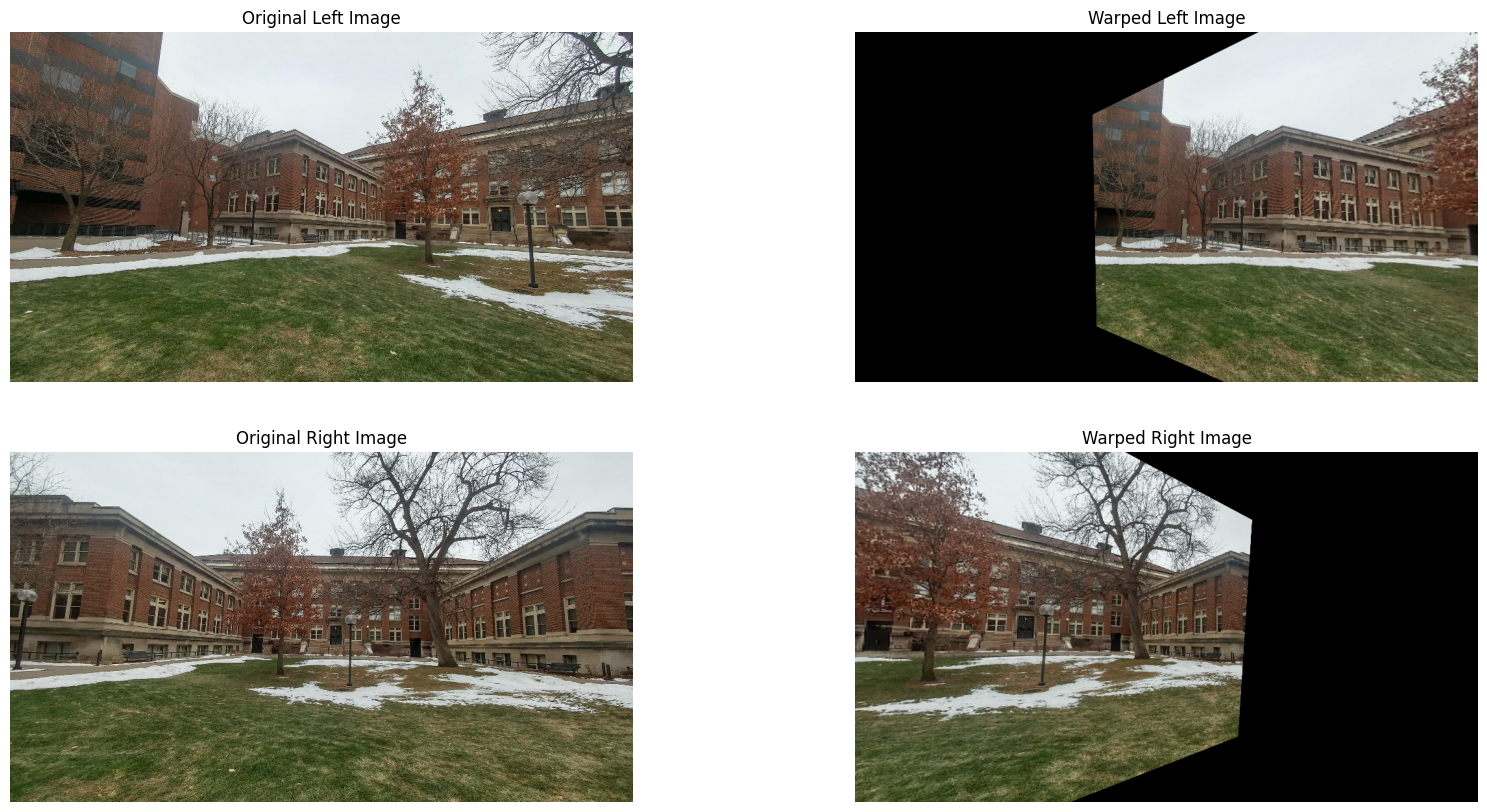

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Left Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(warped_l, cv2.COLOR_BGR2RGB))
plt.title('Warped Left Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Right Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(warped_r, cv2.COLOR_BGR2RGB))
plt.title('Warped Right Image')
plt.axis('off')

plt.show()

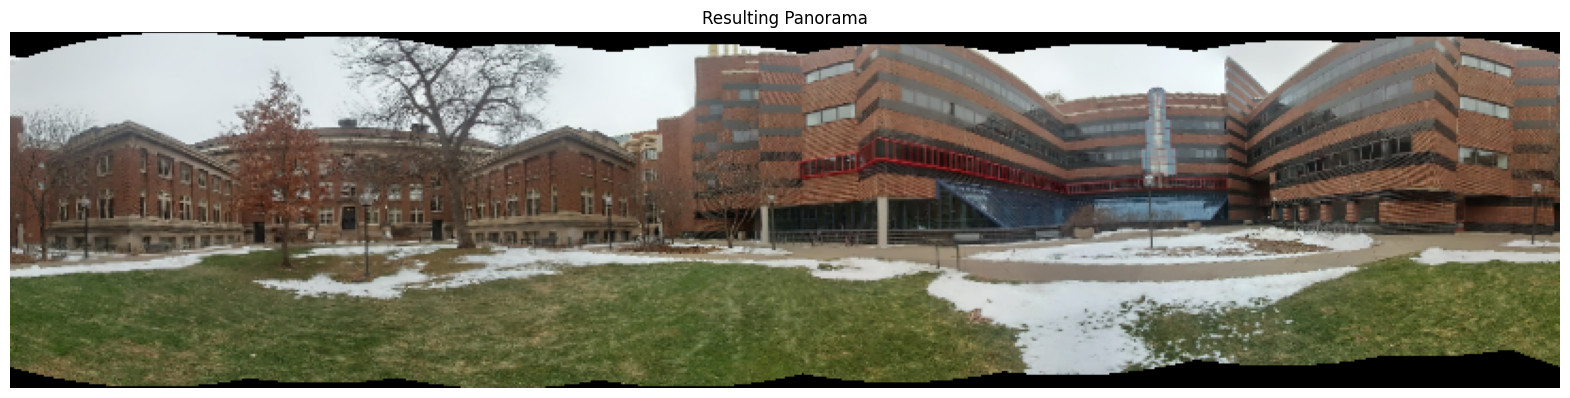

In [11]:
import os
img_path = os.listdir('panaroma_generation')

imgs = []
for i in range(0, len(img_path)):
    imgs.append(cv2.imread('panaroma_generation' + '/' + img_path[i]))
    imgs[i]=cv2.resize(imgs[i],(0,0), fx=0.4, fy=0.4)
stitchy = cv2.Stitcher.create()
dummy, output = stitchy.stitch(imgs)

if dummy!=cv2.STITCHER_OK:
    print("Unsuccessful")
else:
    plt.figure(figsize=(20, 10))
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    plt.imshow(output_rgb)
    plt.title('Resulting Panorama')
    plt.axis('off')  
    plt.show()
    plt.imsave('panaroma_Q6.jpg', output_rgb)

In [7]:
print(H_L)

[[-5.38798676e+01  9.96645125e-01  1.94995168e+04]
 [-1.63439985e+01 -3.34163576e+01  1.01803863e+04]
 [-5.59262109e-02 -1.86804273e-03  1.00000000e+00]]


In [8]:
print(H_R)

[[-1.79925616e-02 -1.82101299e-02  3.65665156e+02]
 [-3.06364592e-01  5.68856638e-01  1.27080897e+02]
 [-1.02176144e-03 -8.13376831e-05  1.00000000e+00]]
